In [1]:
from matplotlib import pyplot as plt
#%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import rc
import matplotlib.pylab as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], "size":16, 'weight' : 'bold'})
rc('text', usetex=True)

In [3]:
# cross --> cross-section (pb)
# delta-xs --> cross-section uncertainty (pb)
# mzp --> z prime mass (GeV)
columns1 = ['cross','delta-xs','mzp']
columns2 = ['cross','delta-xs']
signal = pd.read_csv("data/data_signal_cln_kl_2.txt", names=columns1)
bkg = pd.read_csv("data/data_background_cln.txt", names=columns2)

In [4]:
bkg * 5 * 300

,cross,delta-xs
0,102555.0,237.75


In [5]:
signal_to_noise = signal['cross'].values/[bkg['cross']] 
signal_to_noise = signal_to_noise.flatten()

max_signal_to_noise = (signal['cross'].values + signal['delta-xs'].values)/[bkg['cross'] - bkg['delta-xs']]
max_signal_to_noise = max_signal_to_noise.flatten()

min_signal_to_noise = (signal['cross'].values - signal['delta-xs'].values)/[bkg['cross'] - bkg['delta-xs']]
min_signal_to_noise = min_signal_to_noise.flatten()

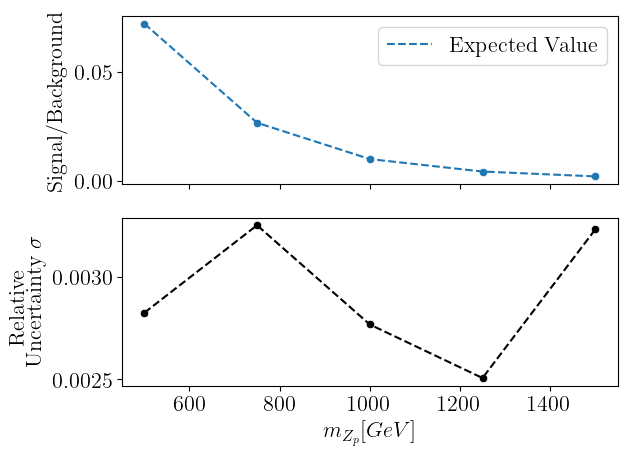

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.lineplot(x=signal.mzp, y=signal_to_noise, label="Expected Value", ls='--', ax = ax[0])
#sns.lineplot(x=signal.mzp, y=max_signal_to_noise, label="Max", ls='--', color='black')
sns.scatterplot(x=signal.mzp, y=signal_to_noise, ax = ax[0])

sns.lineplot(x=signal.mzp, y=signal["delta-xs"]/signal.cross, label="", ls='--', ax = ax[1], color='black')
sns.scatterplot(x=signal.mzp, y=signal["delta-xs"]/signal.cross, ax = ax[1], color='black')


ax[0].set_ylabel('Signal/Background')
ax[1].set_ylabel(r"Relative\\ Uncertainty $\sigma$")
#plt.ylabel(r'$\sigma_{\text{BSM}}/\sigma_{SM}$',size=25)
ax[1].set_xlabel(r'$m_{Z_p} [GeV]$')
plt.savefig('signal_to_noise.pdf', bbox_inches='tight')

In [ ]:
bkg

,cross,delta-xs
0,68.37,0.1585
